In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors

from cycler import cycler

pd.__version__
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

NUM_COLORS = 20
cm = plt.get_cmap('tab20')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
cycler = mpl.rcsetup.cycler(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
plt.rcParams['axes.prop_cycle'] = cycler

results = pd.read_csv('onnx_results/rtx8000-cuda.csv')

In [2]:
BASELINE_VISUAL = {
    "resnet18": "ResNet-18",
    "resnet50": "ResNet-50",
    "resnet101": "ResNet-101",
    "resnet152": "ResNet-152",
    
    "vit32": "ViT32",
}

OTHER_VISUAL = {
    "alexnet": "AlexNet",
    "vgg16": "VGG16",
    "densenet": "DenseNet",
    "inception": "InceptionNet",
    "googlenet": "GoogLeNet",
    "resnext50_32x4d": "ResNext50",
    "wide_resnet50_2": "Wide ResNet-50"
}

EFFICIENT_VISUAL = {
    "efficientnet": "EfficientNet",
    "efficientnet_lite": "EfficientNet Lite",
    # "gernet": "GErNet", 
    "shufflenet": "ShuffleNet",
    "squeezenet": "SqueezeNet", 
    "mobilenet_v2": "MobileNet v2",
    "mnasnet": "MNAS Net"
    }

ALL_VISUAL = {**BASELINE_VISUAL, **OTHER_VISUAL, **EFFICIENT_VISUAL}

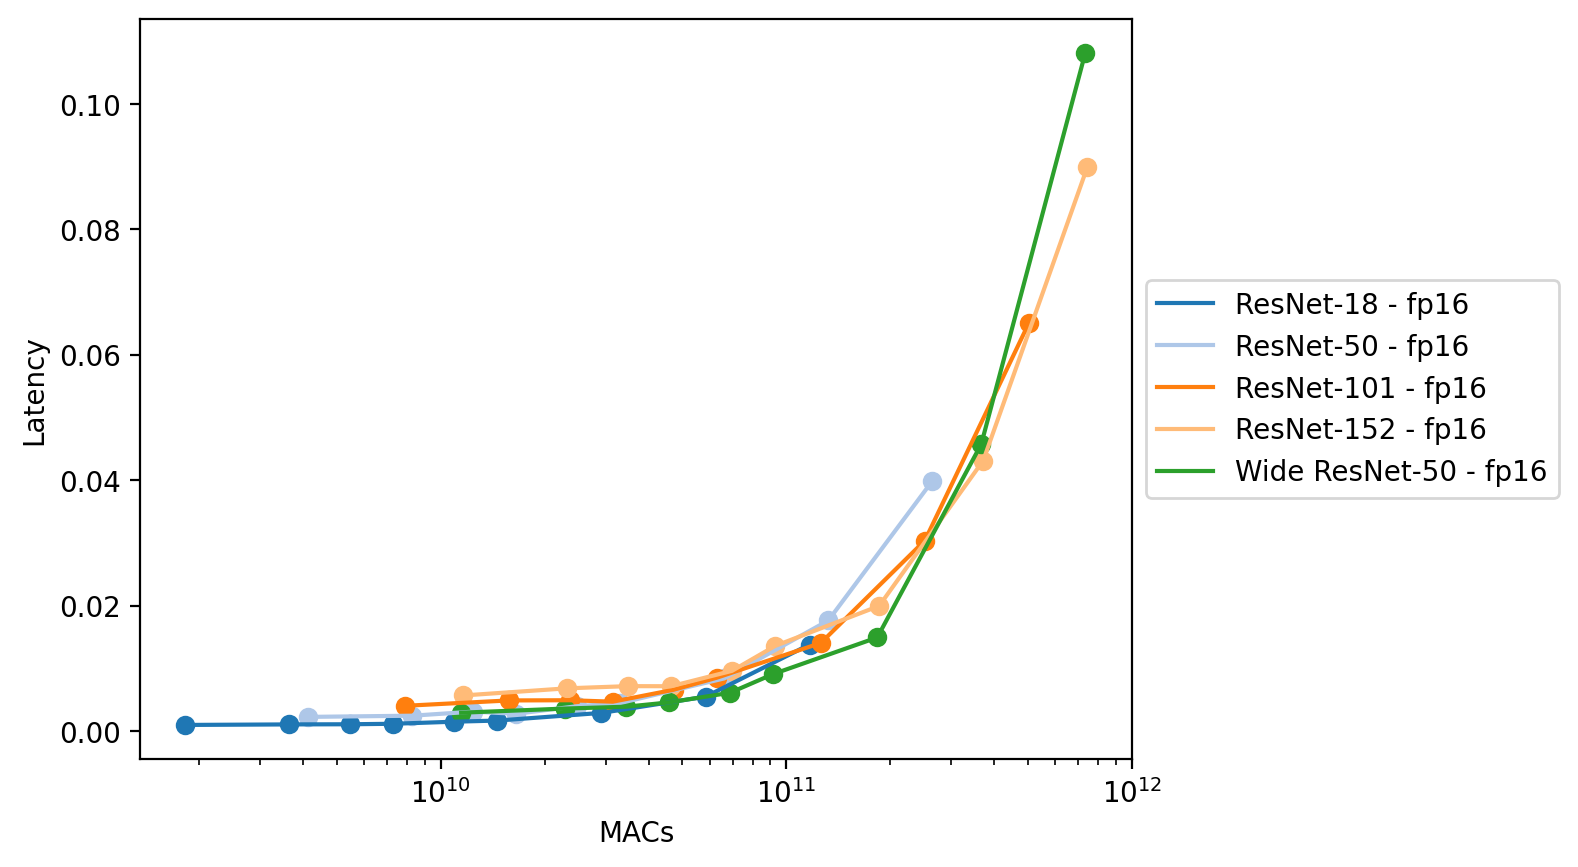

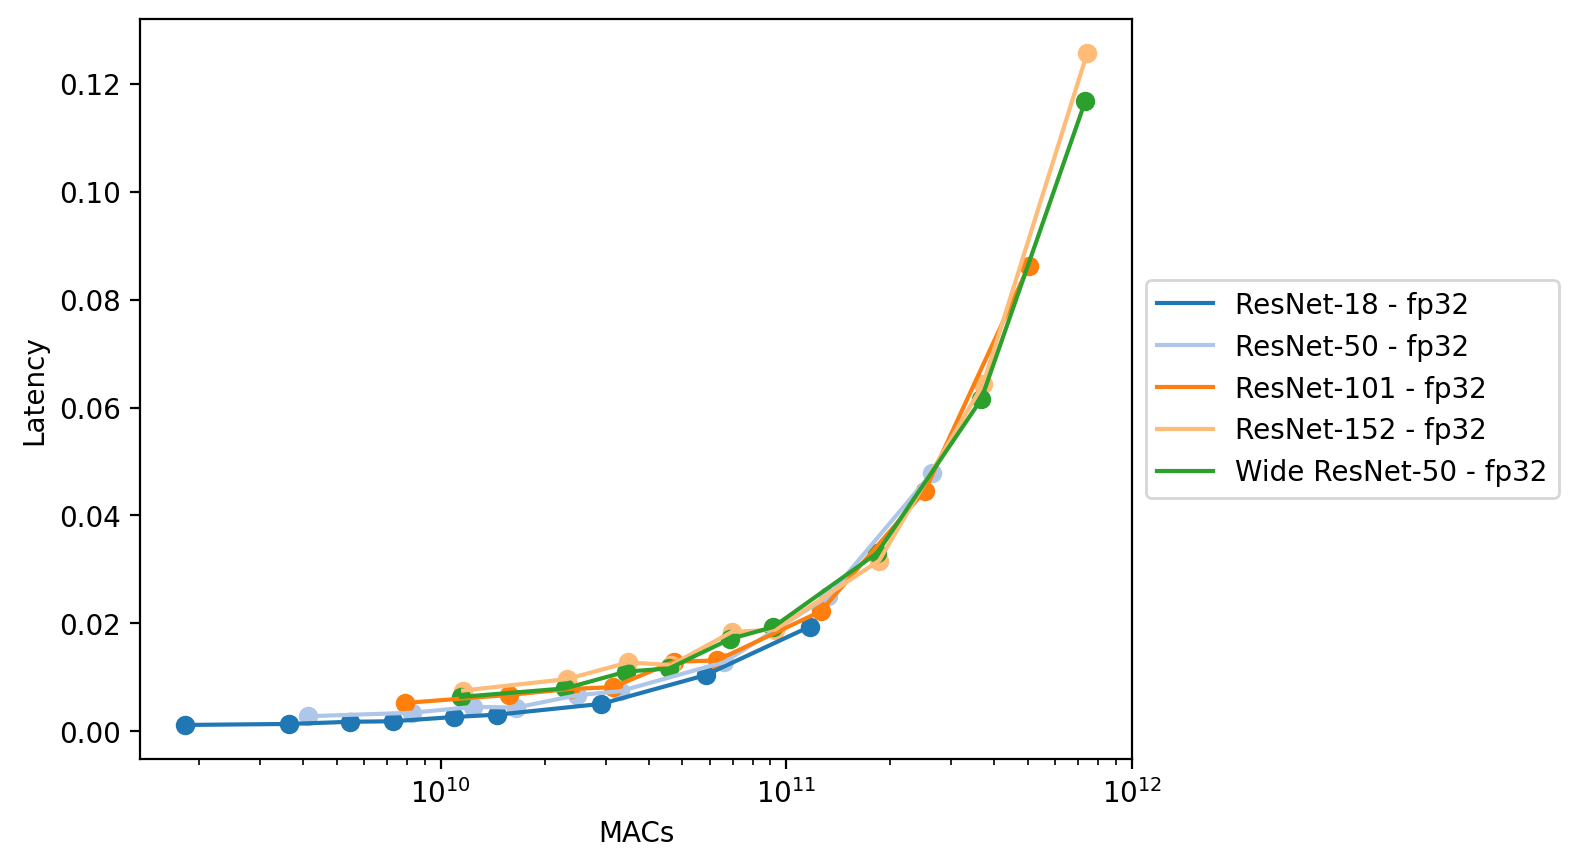

In [18]:
batch_sizes = [1,2,3,4,6,8,16,32,64]
MODELS = {**BASELINE_VISUAL, **EFFICIENT_VISUAL}



for dtype in ['fp16', 'fp32']:
    for model in ALL_VISUAL:
        if not "resnet" in model: continue
        dtype_results = results[results['dtype'] == dtype]
        model_results = dtype_results[dtype_results['model'] == model].sort_values('macs')
        if not len(model_results): continue
        # print(model, batch_sizes, latency)
        macs = model_results['macs']
        latency = model_results['latency']
        plt.scatter(macs, latency)
        plt.plot(macs, latency, label=f"{ALL_VISUAL[model]} - {dtype}")

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Latency')
    plt.xlabel('MACs')
    # plt.yscale('log')
    plt.xscale('log')
    plt.show()

# rtx_bw = [2718.6, 2214.7, 339.9]
# rtx_emp_max_compute = 13164.5
# rtx_thr_max_compute = 16100

# xeon_bw = [456.9, 267.3, 105.1, 46.4, 35.7, 25.6]
# xeon_max = 171.3

# i7_bw = [283.4, 206.6, 141.7, 48.7, 33.1, 24.3]
# i7_max_compute = 54.9

# bw = rtx_bw
# max_compute = rtx_thr_max_compute

# logspace = np.logspace(-1, 3, 50)
# for mem in bw:
#     plt.plot(logspace, [min(mem * _, max_compute) * 1e9 for _ in logspace])
